In [1]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
import csv 
import pandas as pd

percentualTreinamento = 0.7


dataset = {}
# Define the numeric labels to filter
labels={'M','B'}
labels_list = list(labels)


# Define column names based on dataset documentation
columns = [
    "ID", "Diagnosis",
    "Radius_mean", "Texture_mean", "Perimeter_mean", "Area_mean", "Smoothness_mean",
    "Compactness_mean", "Concavity_mean", "Concave_points_mean", "Symmetry_mean", "Fractal_dimension_mean",
    "Radius_se", "Texture_se", "Perimeter_se", "Area_se", "Smoothness_se",
    "Compactness_se", "Concavity_se", "Concave_points_se", "Symmetry_se", "Fractal_dimension_se",
    "Radius_worst", "Texture_worst", "Perimeter_worst", "Area_worst", "Smoothness_worst",
    "Compactness_worst", "Concavity_worst", "Concave_points_worst", "Symmetry_worst", "Fractal_dimension_worst"
]

# Load the dataset
dadosBrutos = pd.read_csv("../dataset/wdbc.data", names=columns, header=None)

# Drop the ID column (not useful for analysis)
dadosBrutos.drop(columns=["ID"], inplace=True)


# Filter rows where a column equals one of the labels
dadosBrutosLabel0 = dadosBrutos[dadosBrutos['Diagnosis'] == labels_list[0]] 
dadosBrutosLabel1 = dadosBrutos[dadosBrutos['Diagnosis'] == labels_list[1]] 

# metadata 
print(dadosBrutos.head())



  Diagnosis  Radius_mean  Texture_mean  Perimeter_mean  Area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   Smoothness_mean  Compactness_mean  Concavity_mean  Concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   Symmetry_mean  ...  Radius_worst  Texture_worst  Perimeter_worst  \
0         0.2419  ...         25.38          17.33 

In [226]:
# Total number of samples

nAmostras_treinamento0 = len(dadosBrutosLabel0)
tamanhoTreinamento0 = int(nAmostras_treinamento0 * percentualTreinamento)

# Randomly select indices for group 1 - treinamento
indices_label0_treinamento = np.random.choice(dadosBrutosLabel0.index, size=tamanhoTreinamento0, replace=False)
# Select remaining indices for group 1 - teste
indices_label0_teste = dadosBrutosLabel0.index.difference(indices_label0_treinamento)

# Determine the size of group 2
nAmostras_treinamento1 = len(dadosBrutosLabel1)
tamanhoTreinamento1 = int(nAmostras_treinamento1 * percentualTreinamento)

# Randomly select indices for group 2 - treinamento
indices_label1_treinamento = np.random.choice(dadosBrutosLabel1.index, size=tamanhoTreinamento1, replace=False)
indices_label1_teste = dadosBrutosLabel0.index.difference(indices_label1_treinamento)

trainData = dadosBrutosLabel0.loc[indices_label0_treinamento]
buffer_trainData = dadosBrutosLabel1.loc[indices_label1_treinamento]
testData = dadosBrutosLabel0.loc[indices_label0_teste]
buffer_testData = dadosBrutosLabel1.loc[indices_label1_treinamento]

filtered_rows_Train = pd.concat([trainData,buffer_trainData], axis=0)
filtered_rows_Test = pd.concat([testData,buffer_testData], axis=0)

trainData = filtered_rows_Train.iloc[:, 1:31].to_numpy()
trainLabels= filtered_rows_Train.iloc[:, 0]
testData = filtered_rows_Test.iloc[:, 1:31].to_numpy()
testLabels= filtered_rows_Test.iloc[:, 0]

# aleatoriza ordem de treinamento
#indicesShuffledTranData = np.random.choice(trainData.index, size=1, replace=False)
#trainData = trainData.loc[indicesShuffledTranData]
#trainLabels = trainLabels.loc[indicesShuffledTranData]


trainLabels = trainLabels.replace({labels_list[0]: 0, labels_list[1]: 1}).to_numpy()
testLabels = testLabels.replace({labels_list[0]: 0, labels_list[1]: 1}) .to_numpy()

print(trainLabels)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/var/folders/nf/hkgtx45s3f7_s6zv1l__8jw40000gp/T/ipykernel_32060/392804951.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  trainLabels = trainLabels.replace({labels_list[0]: 0, labels_list[1]: 1}).to_numpy()
/var/folders/nf/hkgtx45s3f7_s6zv1l__8jw40000gp/T/ipykernel_32060/392804951.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  testLabels = testLabels.replace({labels_list[0]: 0, labels_list[1]: 1}) .to_numpy()


In [277]:
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html

clf = MLPClassifier(solver='sgd', alpha=1e-5, # solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(1024),max_iter=2000)

clf.fit(trainData,trainLabels)

observados_treinamento=clf.predict(trainData)
print("observados_treinamento=",observados_treinamento)
print("soma=",sum(trainLabels==observados_treinamento))
print("len=",len(trainLabels))

print(sum(trainLabels==observados_treinamento)/len(trainLabels))



MSE_treinamento = 1-(1/observados_treinamento.shape[0])*(np.power(np.sum(observados_treinamento-trainLabels),2))
print(MSE_treinamento*100)



observados_treinamento= [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0
 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0]
soma= 356
len= 397
0.8967254408060453
-174.3073047858942


## Loop Principal

/var/folders/nf/hkgtx45s3f7_s6zv1l__8jw40000gp/T/ipykernel_32060/1166319672.py:47: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  trainLabels = trainLabels.replace({labels_list[0]: 0, labels_list[1]: 1}).to_numpy()
/var/folders/nf/hkgtx45s3f7_s6zv1l__8jw40000gp/T/ipykernel_32060/1166319672.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  testLabels = testLabels.replace({labels_list[0]: 0, labels_list[1]: 1}) .to_numpy()
/var/folders/nf/hkgtx45s3f7_s6zv1l__8jw40000gp/T/ipykernel_32060/1166319672.py:47: FutureWarning: Downcasting

Resultado Treinamento:  83.58564231738035 %
Resultado Teste:  82.31640625 %


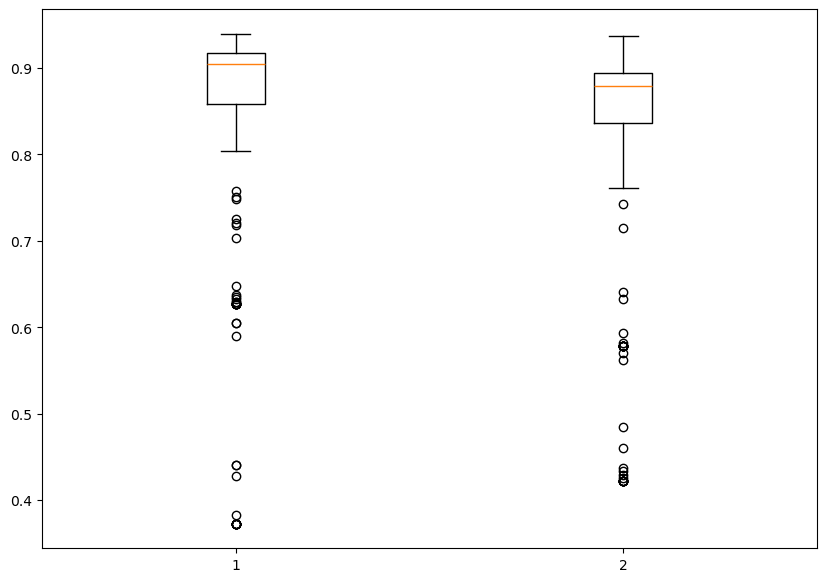

In [301]:
import statistics
import matplotlib.pyplot as plt


nRepeticoes=200
resultadosConsolidados_treino = []
resultadosConsolidados_teste = []

for i in range(nRepeticoes):
    # Total number of samples

    nAmostras_treinamento0 = len(dadosBrutosLabel0)
    tamanhoTreinamento0 = int(nAmostras_treinamento0 * percentualTreinamento)

    # Randomly select indices for group 1 - treinamento
    indices_label0_treinamento = np.random.choice(dadosBrutosLabel0.index, size=tamanhoTreinamento0, replace=False)
    # Select remaining indices for group 1 - teste
    indices_label0_teste = dadosBrutosLabel0.index.difference(indices_label0_treinamento)

    # Determine the size of group 2
    nAmostras_treinamento1 = len(dadosBrutosLabel1)
    tamanhoTreinamento1 = int(nAmostras_treinamento1 * percentualTreinamento)

    # Randomly select indices for group 2 - treinamento
    indices_label1_treinamento = np.random.choice(dadosBrutosLabel1.index, size=tamanhoTreinamento1, replace=False)
    indices_label1_teste = dadosBrutosLabel0.index.difference(indices_label1_treinamento)

    trainData = dadosBrutosLabel0.loc[indices_label0_treinamento]
    buffer_trainData = dadosBrutosLabel1.loc[indices_label1_treinamento]
    testData = dadosBrutosLabel0.loc[indices_label0_teste]
    buffer_testData = dadosBrutosLabel1.loc[indices_label1_treinamento]

    filtered_rows_Train = pd.concat([trainData,buffer_trainData], axis=0)
    filtered_rows_Test = pd.concat([testData,buffer_testData], axis=0)

    trainData = filtered_rows_Train.iloc[:, 1:31].to_numpy()
    trainLabels= filtered_rows_Train.iloc[:, 0]
    testData = filtered_rows_Test.iloc[:, 1:31].to_numpy()
    testLabels= filtered_rows_Test.iloc[:, 0]

    # aleatoriza ordem de treinamento
    #indicesShuffledTranData = np.random.choice(trainData.index, size=1, replace=False)
    #trainData = trainData.loc[indicesShuffledTranData]
    #trainLabels = trainLabels.loc[indicesShuffledTranData]


    trainLabels = trainLabels.replace({labels_list[0]: 0, labels_list[1]: 1}).to_numpy()
    testLabels = testLabels.replace({labels_list[0]: 0, labels_list[1]: 1}) .to_numpy()             
    
    clf = MLPClassifier(solver='sgd', alpha=1e-5, # solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(128,128,128),max_iter=3000)
    clf.fit(trainData,trainLabels)

    resultadoTreinamento=clf.predict(trainData)
    resultadoTeste=clf.predict(testData)

    resultadosConsolidados_treino.append( sum((trainLabels==resultadoTreinamento))/len(trainLabels) )
    resultadosConsolidados_teste.append( sum((testLabels==resultadoTeste))/len(testLabels) )

    # print("observados_treinamento=",observados_treinamento)
    # print("soma=",sum(trainLabels==observados_treinamento))
    # print("len=",len(trainLabels))

    # print(sum(trainLabels==observados_treinamento)/len(trainLabels))

print("Resultado Treinamento: ", 100*statistics.mean(resultadosConsolidados_treino),"%")
print("Resultado Teste: ", 100*statistics.mean(resultadosConsolidados_teste),"%")

ig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot([resultadosConsolidados_treino,resultadosConsolidados_teste])

# show plot
plt.show()



In [303]:
import os
print("Média Treinamento:", np.mean(resultadosConsolidados_treino))
print("Média Teste:", np.mean(resultadosConsolidados_teste))



data = pd.DataFrame({
    'value': resultadosConsolidados_treino+resultadosConsolidados_teste,
    'group': ['MLP\nTreinamento'] * len(resultadosConsolidados_treino) + ['MLP\nTeste'] * len(resultadosConsolidados_teste)
})
string = "../resultados/MLP_breast.csv" 


if not os.path.exists(string):
    data.to_csv(string, index=True)

Média Treinamento: 0.8358564231738035
Média Teste: 0.8231640625
